In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Accounts-Receivable.csv')
print(df.shape)
df.head()

(2466, 12)


,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [3]:
#Review the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


In [4]:
import requests
import pandas_profiling


#Create profiling report
report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)

#Save report to file
report.to_file(output_file= "accounts_receivable.html")

In [5]:
#Chech the unique values of countryCode
df.countryCode.value_counts(normalize=True)

391    0.249797
406    0.227494
770    0.205191
897    0.160584
818    0.156934
Name: countryCode, dtype: float64

In [6]:
#Replace the contrycode with country name and the type to category
df.countryCode.replace({391: 'countryA', 406:'countryB' , 770: 'countryC',\
                        897:'countryD' , 818:'countryE'}, inplace=True)
df.countryCode = df.countryCode.astype('category')

df = df.rename(columns={'countryCode': 'country'})
df.country.value_counts(normalize=True)

countryA    0.249797
countryB    0.227494
countryC    0.205191
countryD    0.160584
countryE    0.156934
Name: country, dtype: float64

**There are 5 unique county.**

In [7]:
#How many unique customerID are there?
df.customerID.value_counts(normalize=True)

9149-MATVB    0.014599
8887-NCUZC    0.014193
4640-FGEJI    0.014193
0688-XNJRO    0.013788
9286-VLKMI    0.013788
                ...   
4632-QZOKX    0.006894
7245-CKNCN    0.006894
3676-CQAIF    0.006894
0187-ERLSR    0.006488
2621-XCLEH    0.006083
Name: customerID, Length: 100, dtype: float64

**There are more than 2400 rows related to 100 unique customerID.**

In [8]:
#in which countries are customers located?
df.groupby('country')['customerID'].count()

country
countryA    616
countryB    561
countryC    506
countryD    396
countryE    387
Name: customerID, dtype: int64

In [9]:
#Check number of customerID in countries
customer_by_country= df.groupby(['customerID','country'])['Disputed'].count().reset_index()
customer_by_country = customer_by_country[customer_by_country.Disputed > 0]
n_customer_in_country= customer_by_country.groupby('customerID')['country'].count().sort_values(ascending= False).reset_index()
n_customer_in_country.head()

,customerID,country
0,9928-IJYBQ,1
1,5148-SYKLB,1
2,3569-VJWXS,1
3,3598-DNURW,1
4,3676-CQAIF,1


**Each customer located in one country.**

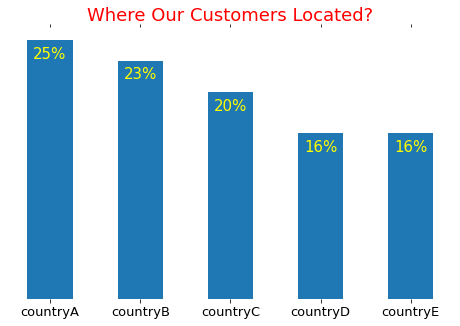

In [10]:
#Plot percentage of customerID in countries
customer_by_country = customer_by_country .groupby('country')['customerID'].count().reset_index()
customer_by_country.columns= ['country','n_customers']
customer_by_country['pct_customers']= round(100* customer_by_country['n_customers'] 
                                            / (customer_by_country['n_customers'].sum()),2)



plt.figure(figsize=(8,5))

bars= plt.bar(x=customer_by_country['country'], height= customer_by_country['pct_customers']\
             , width= 0.5, align='center', linewidth=0)
plt.title('Where Our Customers Located?', fontsize=18, color='red')

#remove all the ticks on both axes, and tick labels on the Y axis
plt.tick_params (top='off', bottom='off', left=False , right=False, labelleft= False, labelbottom='on',
                labelsize= 13)


#direct label each bar with Y axis values
for bar in bars:
    plt.gca().text( bar.get_x() + bar.get_width()/2 , bar.get_height()-1.8,
                   str(int(bar.get_height())) + '%', ha='center', color='yellow', fontsize=15) 

#remove frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible (False)
    
plt.show()

In [11]:
#Is the invoice number as the unique ID?
len(df.invoiceNumber.unique())

2466

**invoiceNumber is a unique ID for each invoice as an entity.**

In [12]:
#Check the values of Disputed column
df.Disputed.value_counts(normalize=True)

No     0.772506
Yes    0.227494
Name: Disputed, dtype: float64

In [13]:
df.Disputed.replace({'Yes': 1, 'No':0}, inplace= True)
df.Disputed.value_counts(normalize= True)

0    0.772506
1    0.227494
Name: Disputed, dtype: float64

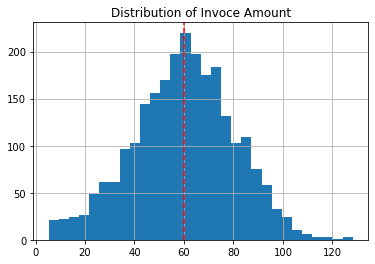

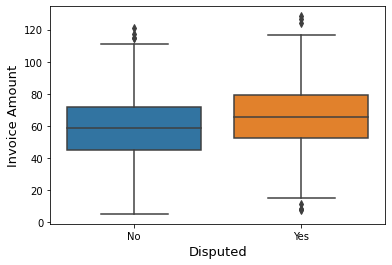

In [14]:
#Check the distribution of invoice amount
df.InvoiceAmount.hist(bins=30)
mean= round(df.InvoiceAmount.mean())
plt.axvline(df['InvoiceAmount'].mean(), linestyle= 'dashed', color='red', label='Mean: {} $'.format(mean))
plt.title('Distribution of Invoce Amount')
plt.show()

sns.boxplot(df.Disputed , df.InvoiceAmount)
plt.ylabel('Invoice Amount', fontsize=13)
plt.xlabel('Disputed', fontsize=13)
plt.xticks([0,1],['No', 'Yes'])
plt.show()

**Invoice amount has normal distribution. Mean of Invoice amount of disputed invoices is higher than not disputed ones.**

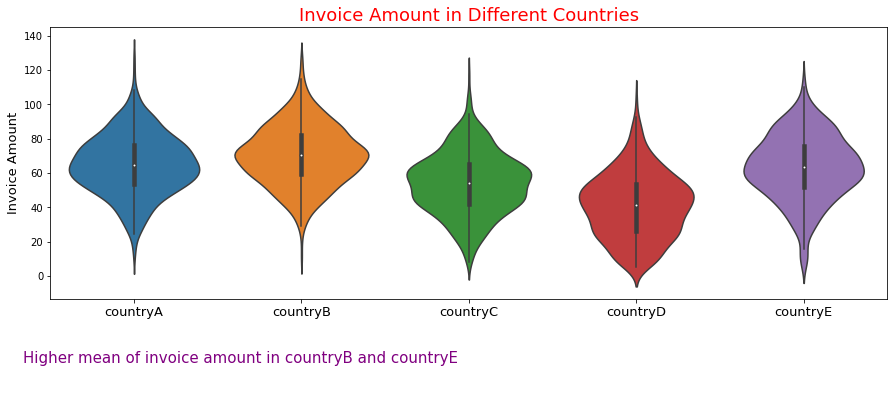

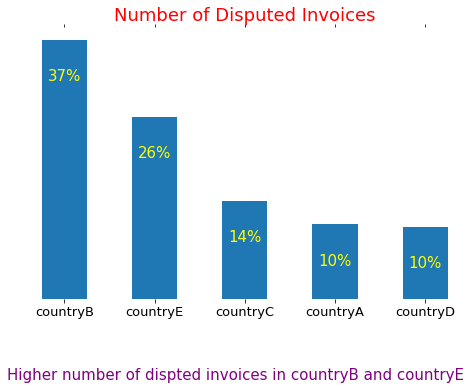

In [15]:
fig = plt.figure(figsize=(15,5))
sns.violinplot(x= df.country, y= df.InvoiceAmount)
plt.xticks(fontsize=13)
plt.xlabel('')
plt.ylabel('Invoice Amount', fontsize=13)
plt.title('Invoice Amount in Different Countries',fontsize=18, color='red')
txt = '''Higher mean of invoice amount in countryB and countryE \n\n'''
fig.text(0.1,-0.15,txt, fontsize=15, color= 'purple')
plt.show()

#DO the countries with higher invoice amount have higher number of disputed invoices?
country_disputed = df.groupby(['country'])['Disputed'].sum().reset_index().sort_values(by='Disputed',ascending= False)
country_disputed['percentage'] = round(100*country_disputed['Disputed'] / (country_disputed['Disputed'].sum()),2)


fig = plt.figure(figsize=(8,5))
bars = plt.bar(x= country_disputed.country, height= country_disputed['percentage']\
              , width= 0.5, align='center', linewidth=0)
plt.xticks(fontsize=12)
plt.title('Number of Disputed Invoices', fontsize=18, color='red')
txt = '''Higher number of dispted invoices in countryB and countryE'''
fig.text(0.1,-0.1,txt, fontsize=15, color='purple')


#remove all the ticks on both axes, and tick labels on the Y axis
plt.tick_params (top='off', bottom='off', left=False , right=False, labelleft= False, labelbottom='on',
                labelsize= 13)


#direct label each bar with Y axis values
for bar in bars:
    plt.gca().text( bar.get_x() + bar.get_width()/2 , bar.get_height()-6,
                   str(int(bar.get_height())) + '%', ha='center', color='yellow', fontsize=15) 

#remove frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible (False)


plt.show()

In [16]:
#What does mean when DaysLate is zero? 
df[(df.DaysLate == 0) & (df.Disputed == 1)].head()

,country,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
5,countryE,5148-SYKLB,8/28/2013,18104516,1/27/2012,2/26/2012,94.00,1,2/22/2012,Paper,26,0
18,countryE,3568-JJMFW,1/9/2012,52765186,10/20/2013,11/19/2013,96.23,1,11/9/2013,Electronic,20,0
55,countryD,6177-VTITE,10/26/2012,195359114,8/29/2012,9/28/2012,56.26,1,9/21/2012,Paper,23,0
82,countryB,4092-ZAVRG,5/19/2012,291694356,2/27/2013,3/29/2013,69.65,1,3/11/2013,Electronic,12,0
91,countryB,5284-DJOZO,9/11/2012,321937283,5/25/2013,6/24/2013,72.85,1,6/8/2013,Electronic,14,0


**The disputed invoices might been paid before due date, it means that the disputed invoices are not necessarily lately paid.**

In [17]:
df[df.PaperlessDate <= df.InvoiceDate].head()

,country,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
2,countryA,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,0,7/8/2013,Electronic,5,0
6,countryD,8690-EEBEO,12/5/2012,23864272,8/13/2013,9/12/2013,74.69,0,9/9/2013,Electronic,27,0
8,countryC,3831-FXWYK,3/8/2013,28049695,5/14/2012,6/13/2012,80.07,1,7/1/2012,Paper,48,18
9,countryD,7654-DOLHO,4/4/2012,32277701,7/1/2013,7/31/2013,48.33,0,7/26/2013,Electronic,25,0
10,countryC,3993-QUNVJ,12/31/2012,35868002,3/31/2012,4/30/2012,75.33,0,4/16/2012,Paper,16,0


**Paperless invoices might be issued before invoice date.**

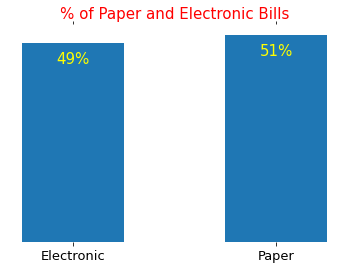

In [18]:
#Encode PaperlessBill column into binary
electronic_bill = pd.get_dummies(df.PaperlessBill, drop_first= True, prefix='bill')
df = df.join(electronic_bill)
df = df.drop('PaperlessBill', axis=1)
paperless_table = round(df.bill_Paper.value_counts(normalize=True),2).reset_index()

paperless_table.columns= ['PaperBill', 'Percentage']


fig= plt.figure()
bars = plt.bar(x= paperless_table['PaperBill'], \
                height= 100 * paperless_table['Percentage'],\
               width= 0.5, align='center', linewidth=0)

plt.xticks([0,1], ['Electronic','Paper'])
plt.title('% of Paper and Electronic Bills', fontsize=15, color='red')


#remove all the ticks on both axes, and tick labels on the Y axis
plt.tick_params (top='off', bottom='off', left=False , right=False, labelleft= False, labelbottom='on',
                labelsize= 13)


#direct label each bar with Y axis values
for bar in bars:
    plt.gca().text( bar.get_x() + bar.get_width()/2 , bar.get_height()-5.,
                   str(int(bar.get_height())) + '%', ha='center', color='yellow', fontsize=15) 

#remove frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible (False)



plt.show()

In [19]:
#Convert the data type of dates from object to datetime
import datetime
df.PaperlessDate = pd.to_datetime(df.PaperlessDate)
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df.DueDate = pd.to_datetime(df.DueDate)
df.SettledDate = pd.to_datetime(df.SettledDate)

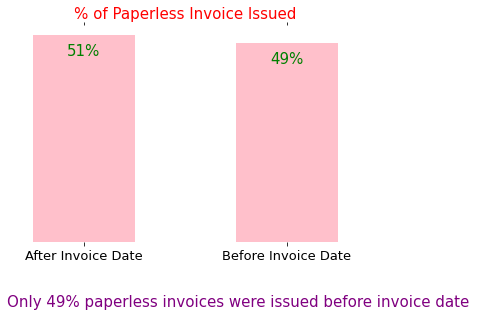

In [20]:
#Were paperless bills issued before due date?
df['paperless_befor_invoicing'] = df[['PaperlessDate','InvoiceDate']].apply(
                                    lambda x: 1 if (x[0] < x[1])  else 0, axis=1)
    
                   
paperless_invoice_table = round(100* df['paperless_befor_invoicing'].value_counts(normalize=True)).reset_index()
paperless_invoice_table.columns= ['Paperless before Invoicing', 'Percentage']


fig= plt.figure()
bars = plt.bar(x= paperless_invoice_table['Paperless before Invoicing'], \
                height= paperless_invoice_table['Percentage'],\
               width= 0.5, align='center', linewidth=0, color= 'pink')

plt.xticks([0,1], ['After Invoice Date','Before Invoice Date'])
plt.title('% of Paperless Invoice Issued', fontsize=15,color='red')


#remove all the ticks on both axes, and tick labels on the Y axis
plt.tick_params (top='off', bottom='off', left=False , right=False, labelleft= False, labelbottom='on',
                labelsize= 13)


#direct label each bar with Y axis values
for bar in bars:
    plt.gca().text( bar.get_x() + bar.get_width()/2 , bar.get_height()-5,
                   str(int(bar.get_height())) + '%', ha='center', color='green', fontsize=15) 

#remove frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible (False)



txt= '''Only 49% paperless invoices were issued before invoice date '''
fig.text(0.1,-0.1,txt, fontsize=15, color= 'purple')

plt.show() 

In [21]:
#When were invoices issued?
diff_invoicedate_duedate = df[['InvoiceDate','DueDate']].apply(lambda x: x[1] - x[0], axis=1)
diff_invoicedate_duedate.value_counts(normalize=True)

30 days    1.0
dtype: float64

**All invoces were issued 30 days before due date.**

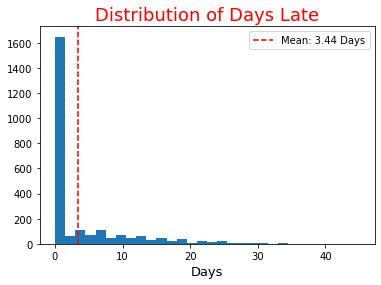

In [26]:
plt.hist(df.DaysLate, bins=30)
mean= round(df.DaysLate.mean(),2)
plt.axvline(mean,linestyle='dashed',label= 'Mean: {} Days'.format(mean), color='red')
plt.title('Distribution of Days Late', fontsize= 18,color= 'red')
plt.xlabel('Days',fontsize=13)
plt.legend()
plt.show()

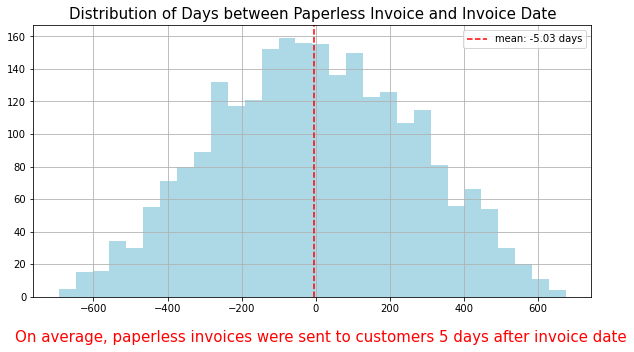

In [27]:
#Lets check how many days are there between paperlessBill and invoicing
#Were paperless bills issued before due date?
df['days_paperless_to_invoiceDate'] = df[['PaperlessDate' , 'InvoiceDate']].apply(
                                        lambda x: pd.Timedelta(x[1]-x[0], 'D').days,axis=1)


fig = plt.figure(figsize=(10,5))
df['days_paperless_to_invoiceDate'].hist(bins=30, color='lightblue')
txt= '''On average, paperless invoices were sent to customers 5 days after invoice date'''
fig.text(0.1,-0,txt, fontsize=15, color='red')
mean = round(df['days_paperless_to_invoiceDate'].mean(), 2)
plt.axvline(mean, linestyle='dashed', color= 'red', label= 'mean: {} days'.format(mean))
plt.title('Distribution of Days between Paperless Invoice and Invoice Date', fontsize=15)
plt.legend()

plt.show()


In [28]:
#Check if DaysToSettle is days between Invoince Date and SettledDate
days_invoicing_settled = df[['InvoiceDate','SettledDate']].apply(lambda x: pd.Timedelta(x[1]-x[0], 'D').days, axis=1)
(days_invoicing_settled != df.DaysToSettle).sum()

0

**DaysToSettle is days between invoice date and settle date.**

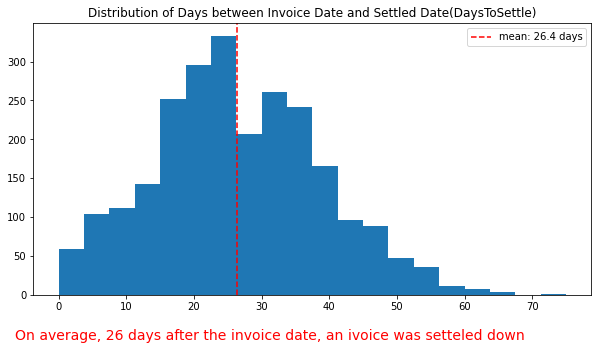

In [29]:
fig = plt.figure(figsize=(10,5))
plt.hist(df.DaysToSettle, bins=20)
plt.title('Distribution of Days between Invoice Date and Settled Date(DaysToSettle)')
mean = round(df.DaysToSettle.mean(),1)
plt.axvline(mean, linestyle='dashed', color='red', label= 'mean: {} days'.format(mean))
plt.legend()
txt = '''On average, 26 days after the invoice date, an ivoice was setteled down'''
fig.text(0.1, 0, txt, fontsize=14, color= 'red')
plt.show()

In [30]:
df.columns

Index(['country', 'customerID', 'PaperlessDate', 'invoiceNumber',
       'InvoiceDate', 'DueDate', 'InvoiceAmount', 'Disputed', 'SettledDate',
       'DaysToSettle', 'DaysLate', 'bill_Paper', 'paperless_befor_invoicing',
       'days_paperless_to_invoiceDate'],
      dtype='object')

**DaysLate is part of DaysToSettle, so they are highly correlated. So, I have to drop DaysLate.**

**Also, 'paperlessbill before invoicing' and 'days_paperlessbill_to_invoicing' are calculated based on PaperlessDate and invoic date.**

In [31]:
df = df.drop(['PaperlessDate', 'invoiceNumber','SettledDate','DaysLate'], axis=1)

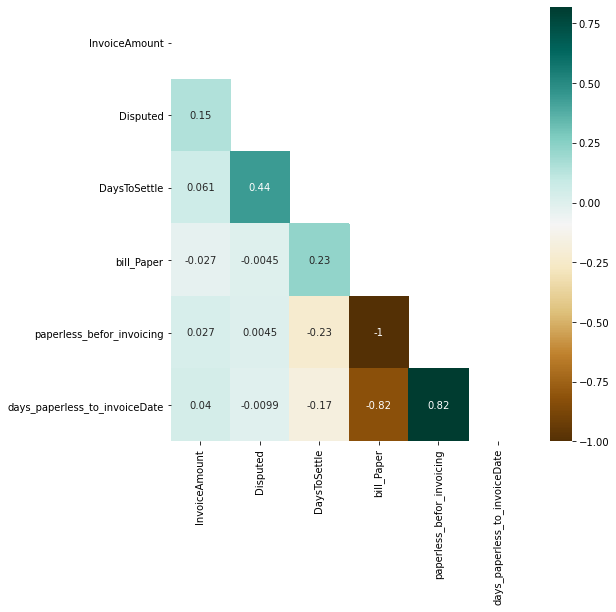

In [32]:
plt.figure(figsize=(8,8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),cmap='BrBG', mask= matrix, annot= True)
plt.show()

In [33]:
#Extract year and monthe of each date
df['InvoiceDate_year'] = df.InvoiceDate.apply(lambda x: x.year)
df['InvoiceDate_month'] = df.InvoiceDate.apply(lambda x: x.month)

df['duedate_year'] = df.DueDate.apply(lambda x: x.year)
df['duedate_month'] = df.DueDate.apply(lambda x: x.month)

df = df.drop(['DueDate','InvoiceDate'], axis= 1)
df.head()

,country,customerID,InvoiceAmount,Disputed,DaysToSettle,bill_Paper,paperless_befor_invoicing,days_paperless_to_invoiceDate,InvoiceDate_year,InvoiceDate_month,duedate_year,duedate_month
0,countryA,0379-NEVHP,55.94,0,13,1,0,-94,2013,1,2013,2
1,countryB,8976-AMJEO,61.74,1,36,0,1,329,2013,1,2013,2
2,countryA,2820-XGXSB,65.88,0,5,0,1,524,2013,7,2013,8
3,countryB,9322-YCTQO,105.92,0,35,0,1,310,2013,2,2013,3
4,countryE,6627-ELFBK,72.27,1,34,1,0,-32,2012,10,2012,11


In [34]:
#Check the range of the year
print('Range of Years:')
print('Invoice Date:', df.InvoiceDate_year.min(),'-',df.InvoiceDate_year.max())
print('Due Date:', df.duedate_year.min(),'-', df.duedate_year.max())

Range of Years:
Invoice Date: 2012 - 2013
Due Date: 2012 - 2014


**Paper and paperless invoices were issued in years between 2012 and 2013.**

**Due date of invoices are between 2012 and 2014.** 

In [35]:
df.head()

,country,customerID,InvoiceAmount,Disputed,DaysToSettle,bill_Paper,paperless_befor_invoicing,days_paperless_to_invoiceDate,InvoiceDate_year,InvoiceDate_month,duedate_year,duedate_month
0,countryA,0379-NEVHP,55.94,0,13,1,0,-94,2013,1,2013,2
1,countryB,8976-AMJEO,61.74,1,36,0,1,329,2013,1,2013,2
2,countryA,2820-XGXSB,65.88,0,5,0,1,524,2013,7,2013,8
3,countryB,9322-YCTQO,105.92,0,35,0,1,310,2013,2,2013,3
4,countryE,6627-ELFBK,72.27,1,34,1,0,-32,2012,10,2012,11


In [36]:
#Encoding country
#encoded_country= pd.get_dummies(df.country, drop_first= False)
#df = df.join(encoded_country).drop('country', axis=1)

#Encoding year of invoice date
encoded_InvoiceDate_year= pd.get_dummies(df.InvoiceDate_year, drop_first= False, prefix='date')
df= df.join(encoded_InvoiceDate_year).drop('InvoiceDate_year', axis=1)

#Encoding year of due date
encoded_duedate_year= pd.get_dummies(df.duedate_year, drop_first= False, prefix='due')
df= df.join(encoded_duedate_year).drop('duedate_year', axis=1)

#Encoding month od invoice date
encoded_InvoiceDate_month= pd.get_dummies(df.InvoiceDate_month, drop_first= True, prefix='date_M')
df= df.join(encoded_InvoiceDate_month).drop('InvoiceDate_month', axis=1)

#Encoding month of duedate 
encoded_duedate_month= pd.get_dummies(df.duedate_month, drop_first= True, prefix='due_M')
df= df.join(encoded_duedate_month).drop('duedate_month', axis=1)

In [37]:
#Encode categorical features
from sklearn.preprocessing import LabelEncoder

def label_encod(df_column):
    df_column = LabelEncoder().fit_transform(df_column)
    return df_column


df['customerID']= label_encod(df['customerID'])
df['country']= label_encod(df['country'])


# Modeling

In [38]:
y = df['DaysToSettle']
X = df.drop('DaysToSettle', axis=1)

In [39]:
#Split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)


## 1. RandomizedSearchCV - RandomForest Regressor  

### 1.1. Build and Find Tuned Model

In [40]:
import random 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


#Instantiat RandomForest Regression model
rf_reg = RandomForestRegressor()

#Create the RandomizedSearchCV object

params_dis= {'n_estimators': list(range(100, 300, 25)),
             'max_depth': [5, None],
             'criterion': ['mse', 'mae']
            }



rf_rand_search = RandomizedSearchCV(estimator = rf_reg, param_distributions = params_dis, \
                                    refit= True, n_iter = 10, n_jobs=-1, cv= 5)


#Fit the RandomizedSearchCV object to the train set
rf_rand_search.fit(X_train, y_train)

#Predict on test set using best estimator 
rf_rand_search.best_params_

{'n_estimators': 275, 'max_depth': None, 'criterion': 'mse'}

### 1.2. Prediction

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Predict on test set using best estimator 
y_pred = rf_rand_search.best_estimator_.predict(X_test)

#Compute performance metrics of best estimator
accuracy= round(rf_rand_search.best_score_ , 2)
r2 = round(rf_rand_search.best_estimator_.score(X_test, y_test) , 2)
mse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)


print('Tuned RandomForestRegressor:\n')
print('Accuracy:',accuracy)
print('Score on test set:', r2)
print('Root of Mean Squared Error: {}'.format(mse))
print('Mean Absolute Error: {} Days'. format(mae))

Tuned RandomForestRegressor:

Accuracy: 0.64
Score on test set: 0.62
Root of Mean Squared Error: 7.27
Mean Absolute Error: 5.57 Days


### 1.3. Feature Importance

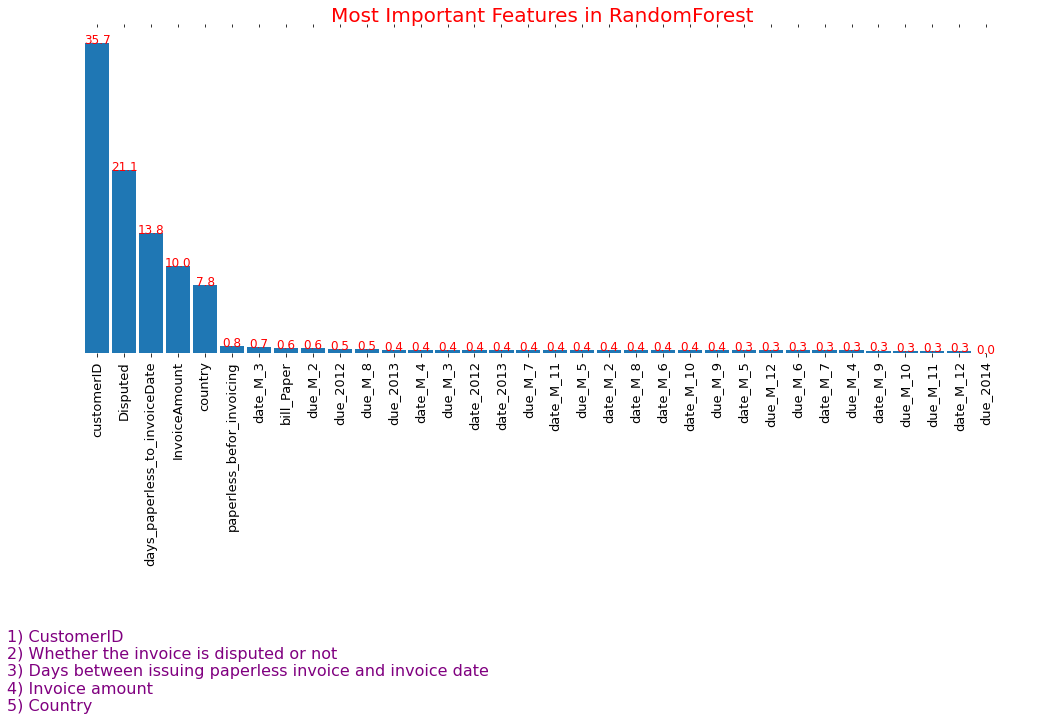

In [42]:
feature_impotances= pd.Series(rf_rand_search.best_estimator_.feature_importances_,\
                              index= X.columns).sort_values(ascending= False)


fig= plt.figure(figsize=(18,6))
bars= plt.bar(x= feature_impotances.index, 
              height= 100*feature_impotances,
             width=0.9,
             align= 'center')

plt.xticks(rotation= 90,fontsize=13)
plt.title('Most Important Features in RandomForest', fontsize= 20, color= 'red')


#direct label each bar with Y axis values
for bar in bars:
    plt.gca().text( bar.get_x() + bar.get_width()/2 , bar.get_height(),
                   '{:.1f}'.format(bar.get_height()), ha='center', color='red', fontsize=12) 

#remove all the ticks on both axes, and tick labels on the Y axis
plt.tick_params (top='off', bottom='off', left=False , right=False, labelleft= False, labelbottom='off')

#remove frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible (False)
    
txt= '''1) CustomerID\n2) Whether the invoice is disputed or not\n3) Days between issuing paperless invoice and invoice date\
\n4) Invoice amount\n5) Country'''
fig.text(0.1,-0.7,txt, fontsize=16, color= 'purple')


plt.show()

## 2. Bayesian Optimization- RandomForest Regressor

Source: https://tech.ovoenergy.com/bayesian-optimisation/

In [43]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score


#General function for building a model
def rf_cv(X, y, **kwargs):
    estimator = RandomForestRegressor(**kwargs)
    cval = cross_val_score(estimator, X, y, scoring = 'neg_mean_squared_error', cv = 4, verbose = 2, n_jobs = -1)
    return cval.mean()


def bayesian_optimise_rf(X, y, n_iter = 100):
    def rf_crossval(n_estimators, max_features):
        #Wrapper of RandomForest cross validation.
        #Note the fixing of the inputs so they match the expected type
        #(e.g n_estimators must be an integer)
        return rf_cv(
            X = X,
            y = y,
            n_estimators = int(n_estimators),
            max_features = max(min(max_features, 0.999), 1e-3),
            bootstrap = True
        )
    
    optimizer = BayesianOptimization(
        f = rf_crossval,
        pbounds = {
            "n_estimators" : (10, 400),
            "max_features" : (0.1, 0.999),
        }
    )
    optimizer.maximize(n_iter = n_iter)
    print("Final result:", optimizer.max)

In [44]:
rf_cv(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s finished


-51.70735523400829

In [45]:
bayesian_optimise_rf(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|   iter    |  target   | max_fe... | n_esti... |
-------------------------------------------------


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  1        | -74.02    |  0.2808   |  96.87    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  2        | -74.7     |  0.2415   |  283.3    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  3        | -86.94    |  0.1447   |  162.4    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  4        | -73.08    |  0.2919   |  239.1    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  5        | -97.28    |  0.1018   |  19.84    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  6        | -64.2     |  0.4694   |  240.5    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  7        | -91.43    |  0.1102   |  242.5    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  8        | -51.57    |  0.999    |  240.0    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  9        | -52.24    |  0.9474   |  240.7    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  10       | -83.57    |  0.1684   |  377.1    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  11       | -69.97    |  0.3505   |  93.85    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  12       | -54.03    |  0.8451   |  91.92    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  13       | -91.9     |  0.1      |  91.12    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  14       | -53.77    |  0.8693   |  92.56    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  15       | -79.08    |  0.2127   |  92.35    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  16       | -52.4     |  0.9786   |  93.32    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  17       | -87.02    |  0.1463   |  348.8    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  18       | -68.66    |  0.3805   |  51.05    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  19       | -66.38    |  0.4561   |  49.42    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  20       | -58.77    |  0.6488   |  47.99    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  21       | -56.8     |  0.7868   |  47.0     |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  22       | -84.69    |  0.173    |  46.19    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  23       | -78.47    |  0.2072   |  47.49    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  24       | -51.41    |  0.9868   |  239.9    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  25       | -52.49    |  0.9332   |  241.2    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  26       | -56.54    |  0.7514   |  52.91    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  27       | -67.73    |  0.3861   |  53.78    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  28       | -87.97    |  0.1178   |  52.28    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  29       | -55.31    |  0.8059   |  48.61    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  30       | -51.75    |  0.9924   |  53.44    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  31       | -61.75    |  0.55     |  217.4    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  32       | -51.06    |  0.9948   |  218.5    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  33       | -73.38    |  0.2785   |  218.9    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  34       | -51.64    |  0.9638   |  216.2    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s finished


|  35       | -80.49    |  0.1772   |  216.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.5s finished


|  36       | -51.32    |  0.9778   |  218.1    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  37       | -51.76    |  0.9778   |  215.0    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.7s finished


|  38       | -51.9     |  0.9623   |  214.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s finished


|  39       | -80.36    |  0.1868   |  214.5    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  40       | -53.5     |  0.8705   |  213.3    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  41       | -52.8     |  0.8898   |  212.3    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  42       | -80.59    |  0.1779   |  212.5    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.7s finished


|  43       | -51.16    |  0.999    |  211.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  44       | -52.95    |  0.8966   |  210.7    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  45       | -77.74    |  0.2188   |  211.1    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.5s finished


|  46       | -51.92    |  0.9621   |  210.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.2s finished


|  47       | -66.58    |  0.398    |  209.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.9s finished


|  48       | -58.75    |  0.6542   |  146.1    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  49       | -61.56    |  0.5566   |  147.1    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.9s finished


|  50       | -51.98    |  0.9524   |  145.1    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.4s finished


|  51       | -86.2     |  0.1212   |  145.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.3s finished


|  52       | -64.56    |  0.4617   |  210.1    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  53       | -52.09    |  0.9172   |  215.6    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  54       | -51.13    |  0.9847   |  144.4    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.6s finished


|  55       | -53.19    |  0.8832   |  143.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s finished


|  56       | -60.11    |  0.5989   |  142.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.3s finished


|  57       | -54.69    |  0.7992   |  141.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.5s finished


|  58       | -61.81    |  0.5529   |  140.3    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.5s finished


|  59       | -80.23    |  0.1911   |  141.4    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.4s finished


|  60       | -83.77    |  0.1756   |  143.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.8s finished


|  61       | -51.57    |  0.9769   |  141.9    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.8s finished


|  62       | -51.22    |  0.9757   |  216.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.8s finished


|  63       | -51.52    |  0.9902   |  139.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.1s finished


|  64       | -65.98    |  0.416    |  138.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.7s finished


|  65       | -51.23    |  0.9927   |  139.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.1s finished


|  66       | -69.32    |  0.3553   |  148.5    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.0s finished


|  67       | -65.64    |  0.4313   |  322.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   10.8s finished


|  68       | -51.04    |  0.999    |  400.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.6s finished


|  69       | -69.86    |  0.3474   |  399.7    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.9s finished


|  70       | -52.28    |  0.963    |  145.1    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.6s finished


|  71       | -60.8     |  0.562    |  139.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.3s finished


|  72       | -51.78    |  0.999    |  196.7    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.1s finished


|  73       | -52.39    |  0.9194   |  197.4    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.8s finished


|  74       | -51.4     |  0.9711   |  216.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s finished


|  75       | -77.56    |  0.2281   |  196.9    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.1s finished


|  76       | -53.05    |  0.9001   |  198.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.5s finished


|  77       | -56.07    |  0.753    |  199.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.9s finished


|  78       | -91.1     |  0.1153   |  198.3    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.3s finished


|  79       | -52.36    |  0.9601   |  199.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.7s finished


|  80       | -69.46    |  0.3361   |  200.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.0s finished


|  81       | -52.41    |  0.9361   |  196.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.9s finished


|  82       | -59.53    |  0.6146   |  195.4    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.0s finished


|  83       | -52.2     |  0.925    |  194.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s finished


|  84       | -75.27    |  0.2446   |  194.3    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.9s finished


|  85       | -53.12    |  0.8917   |  193.5    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.6s finished


|  86       | -60.94    |  0.559    |  192.9    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.9s finished


|  87       | -52.61    |  0.9365   |  191.7    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.7s finished


|  88       | -68.9     |  0.3553   |  191.4    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.9s finished


|  89       | -51.6     |  0.9856   |  213.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.8s finished


|  90       | -53.55    |  0.8596   |  192.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.0s finished


|  91       | -68.58    |  0.3601   |  75.83    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished


|  92       | -52.91    |  0.999    |  30.99    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished


|  93       | -69.43    |  0.3961   |  31.4     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s finished


|  94       | -53.33    |  0.9948   |  30.35    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  95       | -77.56    |  0.2536   |  30.06    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.9s finished


|  96       | -73.21    |  0.2856   |  172.4    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.1s finished


|  97       | -51.65    |  0.999    |  111.5    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.7s finished


|  98       | -53.58    |  0.8662   |  110.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.7s finished


|  99       | -66.1     |  0.413    |  111.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.0s finished


|  100      | -51.9     |  0.9874   |  112.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.1s finished


|  101      | -51.63    |  0.999    |  113.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.5s finished


|  102      | -72.92    |  0.3007   |  112.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.0s finished


|  103      | -52.98    |  0.9271   |  113.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s finished


|  104      | -70.24    |  0.3442   |  114.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  105      | -53.25    |  0.899    |  110.2    |
Final result: {'target': -51.035548145844736, 'params': {'max_features': 0.999, 'n_estimators': 400.0}}


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s finished


**RMSE is 7.14 days, not different with RandomizedSearchCV result.**

## 2) RandomizedSearchCV - ElasticNet Regressor

### 2.1. Build and Find Tuned Model

C:\Users\bahra\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 50 is smaller than n_iter=200. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned ElasticNet Model hase:
alph: 0.0
R squared: 0.19
RMSE 10.61
MAE:8.51 Days


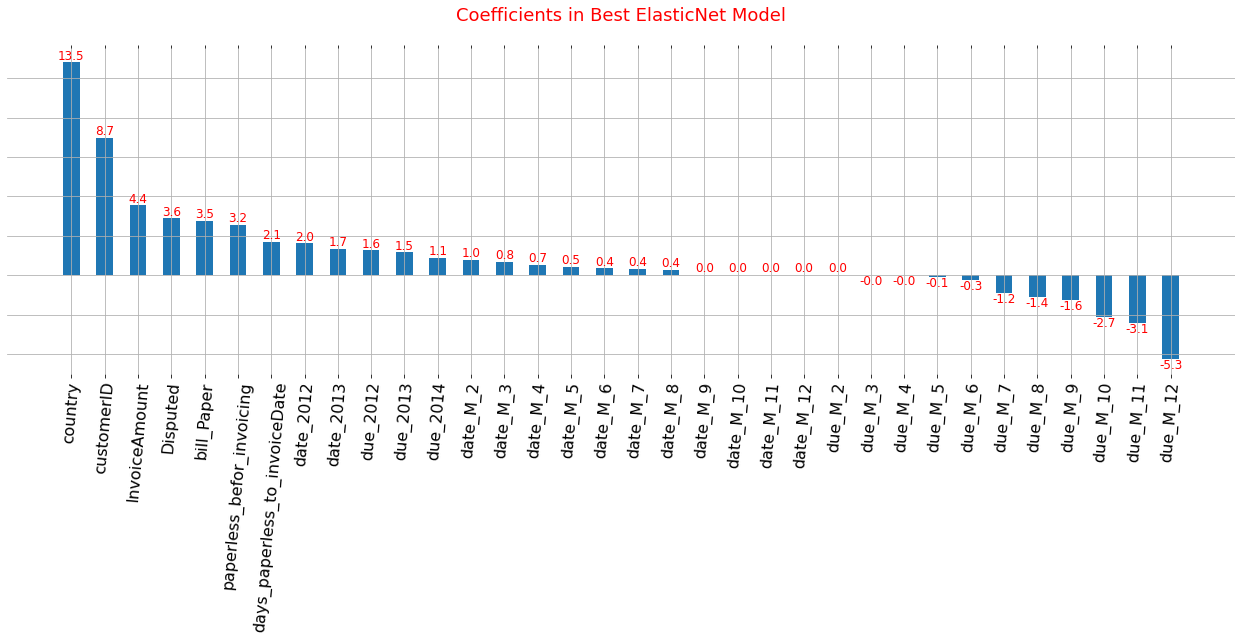

In [48]:
from sklearn.linear_model import ElasticNet


# Specify the hyperparameter search space
param_dis= {'alpha':np.logspace(-4,0,50)}

# Create the RandomizedSearchCV object
estimator= ElasticNet()
rand_search_elastic = RandomizedSearchCV(estimator, param_distributions= param_dis, n_iter=200, n_jobs=-1)

# Fit to the training set
rand_search_elastic.fit(X_train,y_train)



#Compute performance metrics of best estimator
accuracy = round(rand_search_elastic.best_score_, 2)
y_pred = rand_search_elastic.best_estimator_.predict(X_test)
r2 = round(rand_search_elastic.best_estimator_.score(X_test, y_test),2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
mae = round(mean_absolute_error(y_test, y_pred), 2)             


print('Tuned ElasticNet Model hase:')
print('alph:', round(rand_search_elastic.best_estimator_.alpha, 2))
print('R squared:', r2)
print('RMSE', rmse)
print('MAE:{} Days'.format(mae))

Elastic_coef = pd.Series(rand_search_elastic.best_estimator_.coef_,
                         index= X.columns).sort_values(ascending=False)


# Plot the coefficients
plt.figure(figsize=(22,6))
bars= plt.bar(Elastic_coef.index, Elastic_coef, width=0.5)
plt.title('Coefficients in Best ElasticNet Model\n', fontsize=18, color='red')
plt.xticks(range(len(X.columns)), X.columns, rotation= 85, fontsize=16)


#direct label each bar with Y axis values
for bar in bars:
    if bar.get_height() >=0 :
        plt.gca().text( bar.get_x() + bar.get_width()/2 , bar.get_height()+0.2,
                   '{:.1f}'.format(bar.get_height()), ha='center', color='red', fontsize=12) 
    
    else:
        plt.gca().text( bar.get_x() + bar.get_width()/2 , bar.get_height()-0.6,
                   '{:.1f}'.format(bar.get_height()), ha='center', color='red', fontsize=12) 


#remove all the ticks on both axes, and tick labels on the Y axis
plt.tick_params (top='off', bottom='off', left=False , right=False, labelleft= False, labelbottom='off')

#remove frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible (False)
    
plt.grid(which='both')
#plt.margins(0.02)
plt.show()

## 3) Gradient Boosting Regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

grad_boost_reg = GradientBoostingRegressor(**params)
grad_boost_reg.fit(X_train, y_train)

y_pred= grad_boost_reg.predict(X_test)
mse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
mae = round(mean_absolute_error(y_test, y_pred),2)
print('RMSE: {}'.format(rmse))
print('MAE: {}'.format(mae))

RMSE: 10.61
MAE: 6.11
